In [1]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/macbook/opt/anaconda3/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
mnist = load_digits()

In [4]:
def plot_digits(images):
    fig = plt.figure(figsize=(15, 7))
    for i in range(10):
        sub_plot = fig.add_subplot(2, 5, i + 1)
        sub_plot.imshow(images[i], cmap=plt.cm.binary)
        sub_plot.set_title(f"Target {i}")

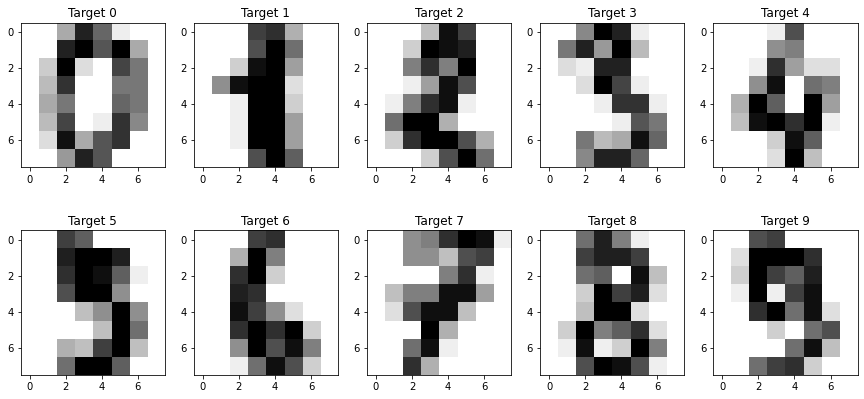

In [5]:
data = mnist.data
target = mnist.target
plot_digits(mnist.images)

In [6]:
def pca(X, n, max_variance=True):
    # Compute x average matrix
    # 2. Subtract mean B = X - Xbar
    # X /= np.std(X, axis=0)
    B = X - np.mean(X, axis=0)

    # 3. Compute the covariance matrix of rows of B:
    C = np.cov(B, rowvar=False)

    # 4. Compute the eigs of C
    v, w = np.linalg.eigh(C)

    if max_variance == False:
        indices = v.argsort()
    else:
        indices = v.argsort()[::-1]

    # sort the eigenvalues
    v = v[indices]
    # sort the eigenvectors corresponding to eigenvalues
    w = w[:, indices]

    return B.dot(w[:, :n])

In [7]:
n_components = 2
sklearn_PCA = PCA(n_components)
implemented_PCA_result = pca(data, n_components)

In [8]:
explained_variance = np.array([(implemented_PCA_result[:, i] ** 2).sum() / (n_components - 1) for i in range(n_components)])
total_var = ((data - data.mean(axis=0)) ** 2).sum() / (n_components - 1)
print("Explained Variance ratio: " + str(explained_variance / total_var))

Explained Variance ratio: [0.14890594 0.13618771]


In [11]:
sklearn_PCA_res = sklearn_PCA.fit_transform(data)

In [14]:
print("Explained Variance ratio sklearn: " + str(sklearn_PCA.explained_variance_ratio_))

Explained Variance ratio sklearn: [0.14890594 0.13618771]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, '2 Principal Comp corresponding to the dim with highest variance')

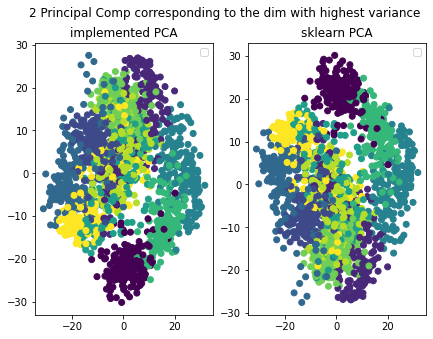

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(7, 5))
for i in range(10):
    ax[0].scatter(implemented_PCA_result[:, 0][target==i],
                  implemented_PCA_result[:, 1][target==i], label = i)
    ax[0].legend()
    ax[0].set_title("implemented PCA")
    ax[1].scatter(sklearn_PCA_res[:, 0][target==i],
                  sklearn_PCA_res[:, 1], c = target)
    ax[1].legend()
    ax[1].set_title("sklearn PCA")
fig.suptitle(f"2 Principal Comp corresponding to the dim with highest variance")

In [17]:
sklearn_PCA_res[:, 0][target==1]

array([ 7.95761166,  3.00917969,  0.02586226,  2.82452833,  1.64400683,
        3.25399182,  7.91430924,  0.19165821,  7.49905051,  3.13518076,
       12.55869036, 19.92225555, -0.79194965, -3.90704441,  2.80175261,
       -2.23052142, -2.31379077, -1.92323514,  2.06795932,  7.20773128,
        1.43981688,  1.07616348, -1.63098518,  7.58238203,  3.91738709,
        9.5303384 , 10.84806628,  8.76902601, 13.43146039, 14.17176873,
        9.71837942,  5.59287402, 11.39130447,  8.2792531 ,  6.87624772,
       10.92702775, 10.12973442,  3.46750706, 15.20666521, -6.06287846,
        2.50737534,  4.50037497, -1.30507416,  1.50999679, -0.25197296,
       -0.47441648,  6.42480596, 12.66228067, -0.34256772,  1.40908167,
        1.31733909,  2.27194846, -0.87753005, -0.21749844,  1.61778572,
        7.41517756, 11.96066065,  9.68021653, 12.10282189,  8.26331966,
        4.96737614,  8.94526643,  0.43015802,  7.91420189, -0.20412162,
       10.29799953, 13.70116519, 18.14147231, 10.24928377, 10.37